In [2]:
import pandas as pd

# https://www.kaggle.com/datasets/viveksharmar/flight-price-data

df = pd.read_csv('/content/flight_dataset.csv')
df.head()

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,16,50,21,35,4,45


In [3]:
df = df.drop(columns=['Airline', 'Source', 'Destination'])
df

,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min
0,0,3897,24,3,2019,22,20,1,10,2,50
1,2,7662,1,5,2019,5,50,13,15,7,25
2,2,13882,9,6,2019,9,25,4,25,19,0
3,1,6218,12,5,2019,18,5,23,30,5,25
4,1,13302,1,3,2019,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,9,4,2019,19,55,22,25,2,30
10679,0,4145,27,4,2019,20,45,23,20,2,35
10680,0,7229,27,4,2019,8,20,11,20,3,0
10681,0,12648,1,3,2019,11,30,14,10,2,40


In [4]:
dataset = df.values
dataset

array([[    0,  3897,    24, ...,    10,     2,    50],
       [    2,  7662,     1, ...,    15,     7,    25],
       [    2, 13882,     9, ...,    25,    19,     0],
       ...,
       [    0,  7229,    27, ...,    20,     3,     0],
       [    0, 12648,     1, ...,    10,     2,    40],
       [    2, 11753,     9, ...,    15,     8,    20]])

In [5]:
X = dataset[:,1:12]
X

array([[ 3897,    24,     3, ...,    10,     2,    50],
       [ 7662,     1,     5, ...,    15,     7,    25],
       [13882,     9,     6, ...,    25,    19,     0],
       ...,
       [ 7229,    27,     4, ...,    20,     3,     0],
       [12648,     1,     3, ...,    10,     2,    40],
       [11753,     9,     5, ...,    15,     8,    20]])

In [6]:
Y = dataset[:,0]
Y

array([0, 2, 2, ..., 0, 0, 2])

In [7]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [8]:
X_scale

array([[0.02749733, 0.88461538, 0.        , ..., 0.18181818, 0.02173913,
        0.90909091],
       [0.0759199 , 0.        , 0.66666667, ..., 0.27272727, 0.13043478,
        0.45454545],
       [0.15591681, 0.30769231, 1.        , ..., 0.45454545, 0.39130435,
        0.        ],
       ...,
       [0.07035098, 1.        , 0.33333333, ..., 0.36363636, 0.04347826,
        0.        ],
       [0.14004604, 0.        , 0.        , ..., 0.18181818, 0.02173913,
        0.72727273],
       [0.12853523, 0.30769231, 0.66666667, ..., 0.27272727, 0.15217391,
        0.36363636]])

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [10]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [11]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(7478, 10) (1602, 10) (1603, 10) (7478,) (1602,) (1603,)


In [12]:
from keras.models import Sequential
from keras.layers import Dense

In [13]:
#  sequentially (layer by layer)
#  ‘Dense’ refers to a fully-connected layer
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [16]:
# ‘sgd’ refers to stochastic gradient descent
# The loss function for outputs that take the values 1 or 0 is called binary cross entropy.
# we want to track accuracy on top of the loss function
model.compile(optimizer='sgd',
              loss='binary_crossentropy', #loss mse
              metrics=['accuracy'])

In [17]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=15,
          validation_data=(X_val, Y_val))

Epoch 1/15
234/234 [==============================] - 1s 3ms/step - loss: 0.2188 - mean_absolute_percentage_error: 97398696.0000 - val_loss: 0.2034 - val_mean_absolute_percentage_error: 89393136.0000
Epoch 2/15
234/234 [==============================] - 1s 3ms/step - loss: 0.2078 - mean_absolute_percentage_error: 84281584.0000 - val_loss: 0.1966 - val_mean_absolute_percentage_error: 78385056.0000
Epoch 3/15
234/234 [==============================] - 1s 2ms/step - loss: 0.2030 - mean_absolute_percentage_error: 78738280.0000 - val_loss: 0.1929 - val_mean_absolute_percentage_error: 78674880.0000
Epoch 4/15
234/234 [==============================] - 1s 2ms/step - loss: 0.1998 - mean_absolute_percentage_error: 75495728.0000 - val_loss: 0.1904 - val_mean_absolute_percentage_error: 68446704.0000
Epoch 5/15
234/234 [==============================] - 1s 2ms/step - loss: 0.1975 - mean_absolute_percentage_error: 72205920.0000 - val_loss: 0.1880 - val_mean_absolute_percentage_error: 70164448.0000


In [18]:
# The reason why we have the index 1 after the model.evaluate function is because the function returns the loss as the first element and the accuracy as the second element.
model.evaluate(X_test, Y_test)[1]

51/51 [==============================] - 0s 2ms/step - loss: 0.2015 - mean_absolute_percentage_error: 45288760.0000


45288760.0

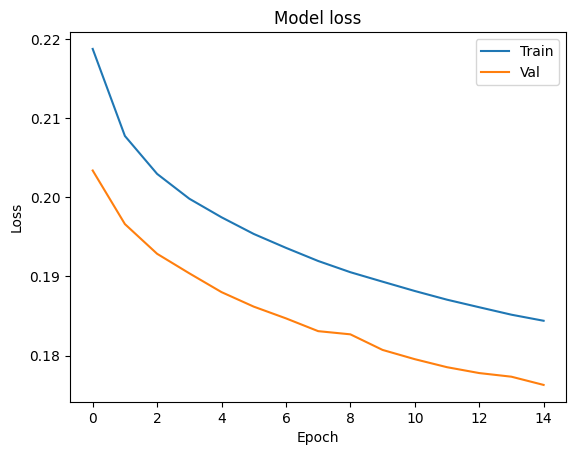

In [19]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

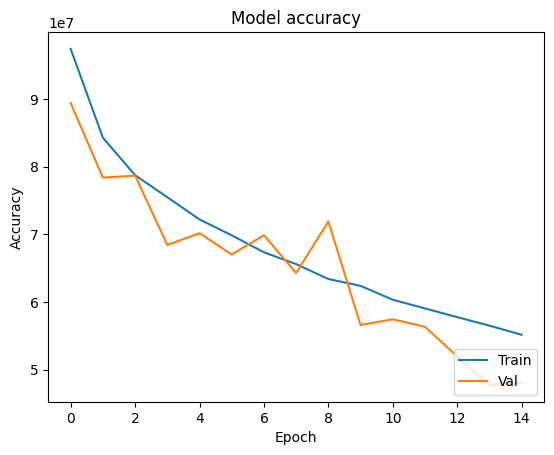

In [22]:
plt.plot(hist.history['mean_absolute_percentage_error'])
plt.plot(hist.history['val_mean_absolute_percentage_error'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [24]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [25]:
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [26]:
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=10,
          validation_data=(X_val, Y_val))

Epoch 1/10
234/234 [==============================] - 18s 71ms/step - loss: -4828501.0000 - accuracy: 0.6970 - val_loss: -35814112.0000 - val_accuracy: 0.6492
Epoch 2/10
234/234 [==============================] - 15s 65ms/step - loss: -668128448.0000 - accuracy: 0.7194 - val_loss: -2248287232.0000 - val_accuracy: 0.8146
Epoch 3/10
234/234 [==============================] - 15s 65ms/step - loss: -9575828480.0000 - accuracy: 0.7233 - val_loss: -21243897856.0000 - val_accuracy: 0.6754
Epoch 4/10
234/234 [==============================] - 15s 64ms/step - loss: -52985860096.0000 - accuracy: 0.7232 - val_loss: -93761347584.0000 - val_accuracy: 0.6779
Epoch 5/10
234/234 [==============================] - 16s 66ms/step - loss: -180960608256.0000 - accuracy: 0.7231 - val_loss: -278135799808.0000 - val_accuracy: 0.7403
Epoch 6/10
234/234 [==============================] - 20s 86ms/step - loss: -465571872768.0000 - accuracy: 0.7233 - val_loss: -657680629760.0000 - val_accuracy: 0.6654
Epoch 7/10


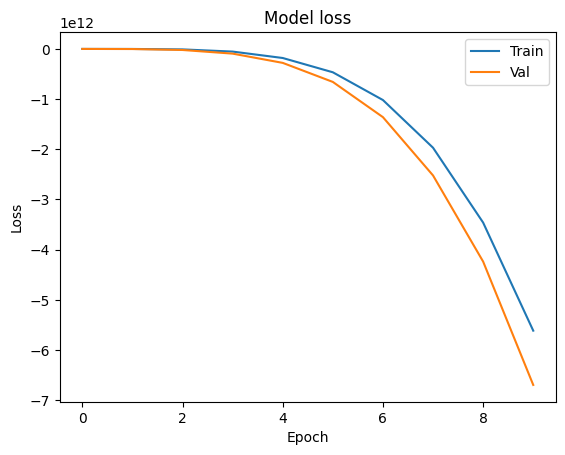

In [27]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

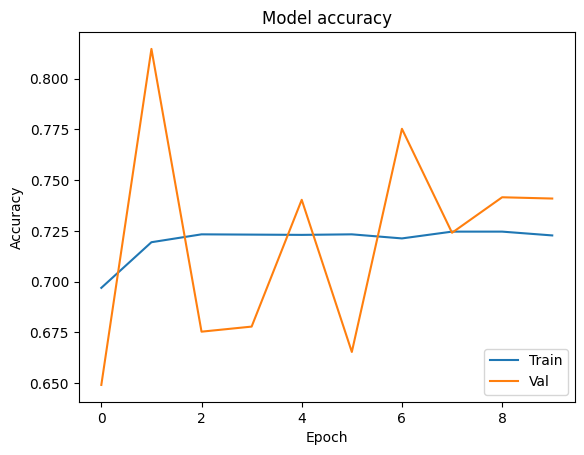

In [28]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [29]:
from keras.layers import Dropout
from keras import regularizers

In [30]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [31]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [32]:
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=10,
          validation_data=(X_val, Y_val))

Epoch 1/10
234/234 [==============================] - 20s 78ms/step - loss: -6094864.5000 - accuracy: 0.6823 - val_loss: -50563852.0000 - val_accuracy: 0.8127
Epoch 2/10
234/234 [==============================] - 18s 76ms/step - loss: -1352862976.0000 - accuracy: 0.7261 - val_loss: -4844954624.0000 - val_accuracy: 0.7484
Epoch 3/10
234/234 [==============================] - 18s 75ms/step - loss: -21281634304.0000 - accuracy: 0.7279 - val_loss: -48074018816.0000 - val_accuracy: 0.7141
Epoch 4/10
234/234 [==============================] - 28s 121ms/step - loss: -118907994112.0000 - accuracy: 0.7257 - val_loss: -213949169664.0000 - val_accuracy: 0.7853
Epoch 5/10
234/234 [==============================] - 17s 74ms/step - loss: -409977978880.0000 - accuracy: 0.7281 - val_loss: -644527620096.0000 - val_accuracy: 0.7978
Epoch 6/10
234/234 [==============================] - 17s 74ms/step - loss: -1072680337408.0000 - accuracy: 0.7307 - val_loss: -1548032147456.0000 - val_accuracy: 0.7528
Epoc

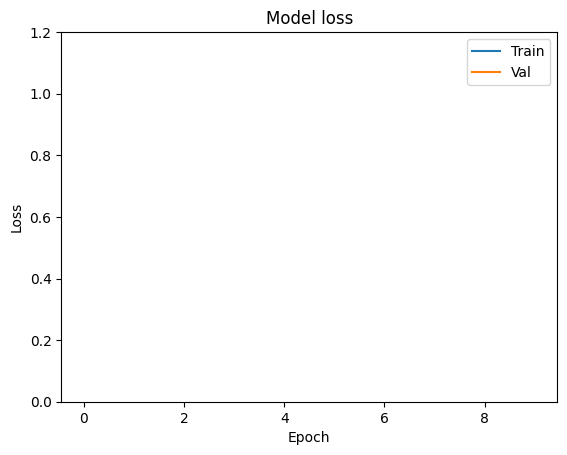

In [33]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

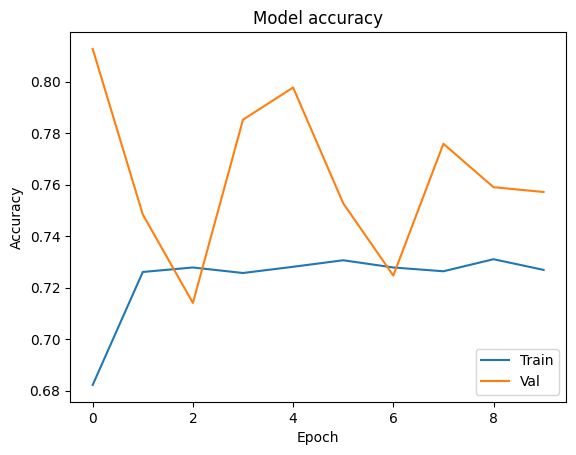

In [68]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [35]:
y_pred = model.predict(X_test)

51/51 [==============================] - 0s 1ms/step


In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calcular métricas de error
mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, y_pred)
mape = np.mean(np.abs((Y_test - y_pred) / Y_test)) * 100

<ipython-input-36-0f5a5b94dc2c>:9: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((Y_test - y_pred) / Y_test)) * 100


In [37]:
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R²: {r2}')
print(f'MAPE: {mape}')

MAE: 0.25235013755564756
MSE: 0.2014849323552704
RMSE: 0.448870730116445
R²: 0.5648840596692668
MAPE: inf


In [58]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers
from keras import metrics

model4 = keras.models.Sequential([keras.layers.Dense(30, activation='relu',
         input_shape=X_train.shape[1:]),keras.layers.Dense(1)])

In [59]:
# ‘sgd’ refers to stochastic gradient descent
# The loss function for outputs that take the values 1 or 0 is called binary cross entropy.
# we want to track accuracy on top of the loss function
model4.compile(optimizer='sgd',
              loss='mean_squared_error', #loss mse
              metrics=[metrics.RootMeanSquaredError(),
                       metrics.MeanAbsolutePercentageError()])

In [60]:
hist_4 = model4.fit(X_train, Y_train,
          batch_size=32, epochs=10,
          validation_data=(X_val, Y_val))

Epoch 1/10
234/234 [==============================] - 2s 5ms/step - loss: 0.4538 - root_mean_squared_error: 0.6737 - mean_absolute_percentage_error: 233998912.0000 - val_loss: 0.3653 - val_root_mean_squared_error: 0.6044 - val_mean_absolute_percentage_error: 220402576.0000
Epoch 2/10
234/234 [==============================] - 1s 3ms/step - loss: 0.3247 - root_mean_squared_error: 0.5699 - mean_absolute_percentage_error: 206253296.0000 - val_loss: 0.2764 - val_root_mean_squared_error: 0.5257 - val_mean_absolute_percentage_error: 188919952.0000
Epoch 3/10
234/234 [==============================] - 1s 3ms/step - loss: 0.2487 - root_mean_squared_error: 0.4987 - mean_absolute_percentage_error: 168553248.0000 - val_loss: 0.2162 - val_root_mean_squared_error: 0.4650 - val_mean_absolute_percentage_error: 145336032.0000
Epoch 4/10
234/234 [==============================] - 1s 3ms/step - loss: 0.2066 - root_mean_squared_error: 0.4545 - mean_absolute_percentage_error: 137957472.0000 - val_loss: 0.

<Axes: >

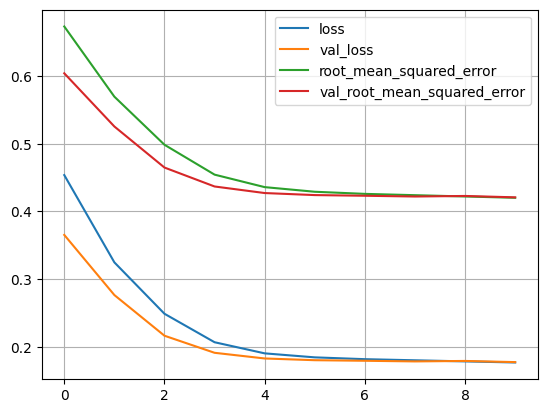

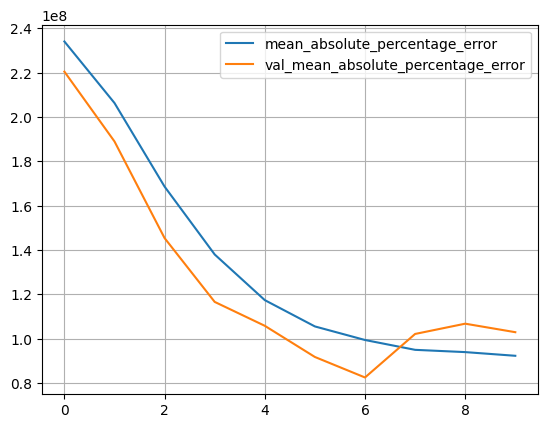

In [61]:
dfhistory = pd.DataFrame(hist_4.history, index=hist_4.epoch)
dfhistory[['loss', 'val_loss', 'root_mean_squared_error', 'val_root_mean_squared_error']].plot(grid=True)
dfhistory[['mean_absolute_percentage_error',
           'val_mean_absolute_percentage_error']].plot(grid=True)

In [67]:
loss, rmse, mape = model4.evaluate(X_train, Y_train)
print("Evaluación del ultimo modelo en el conjunto de entrenamiento")
print(f'Loss: {loss}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

loss, rmse, mape = model4.evaluate(X_val, Y_val)
print("Evaluación del ultimo modelo en el conjunto de validación")
print(f'Loss: {loss}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

loss, rmse, mape = model4.evaluate(X_test, Y_test)
print("Evaluación del ultimo modelo en el conjunto de prueba")
print(f'Loss: {loss}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

234/234 [==============================] - 1s 5ms/step - loss: 0.1763 - root_mean_squared_error: 0.4199 - mean_absolute_percentage_error: 103147096.0000
Evaluación del ultimo modelo en el conjunto de entrenamiento
Loss: 0.1762833446264267
RMSE: 0.4198611080646515
MAPE: 103147096.0
51/51 [==============================] - 0s 2ms/step - loss: 0.1772 - root_mean_squared_error: 0.4209 - mean_absolute_percentage_error: 102913824.0000
Evaluación del ultimo modelo en el conjunto de validación
Loss: 0.17716814577579498
RMSE: 0.4209134578704834
MAPE: 102913824.0
51/51 [==============================] - 0s 2ms/step - loss: 0.1870 - root_mean_squared_error: 0.4324 - mean_absolute_percentage_error: 95940184.0000
Evaluación del ultimo modelo en el conjunto de prueba
Loss: 0.18699763715267181
RMSE: 0.43243223428726196
MAPE: 95940184.0
